<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


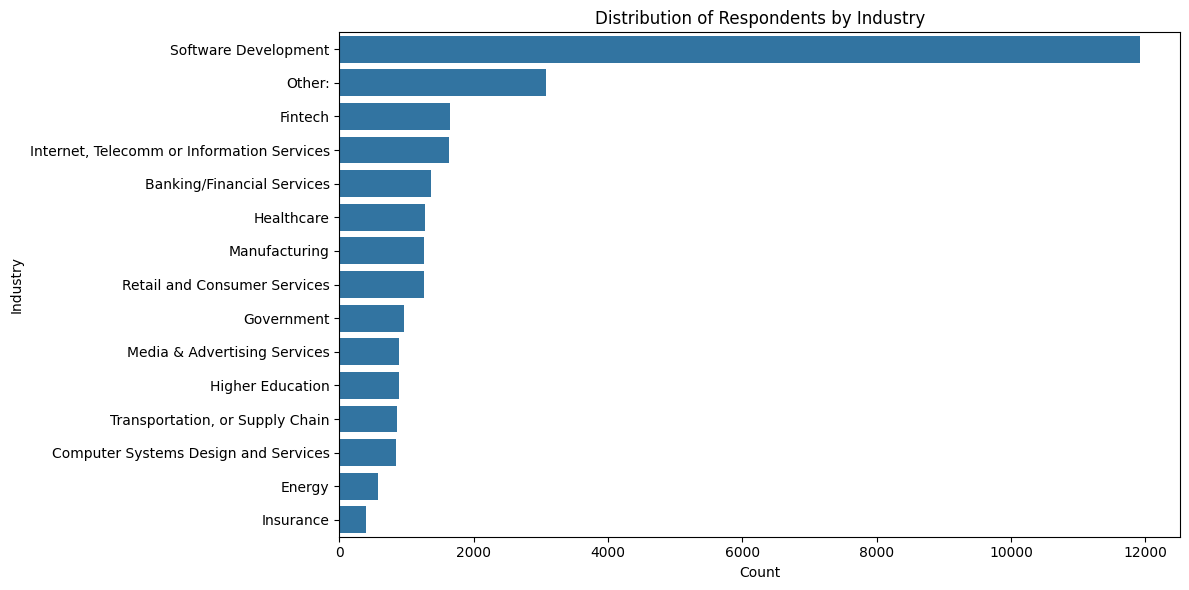

In [3]:
##Write your code here
industry_counts = df["Industry"].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(
    x=industry_counts.values,
    y=industry_counts.index
)
plt.title("Distribution of Respondents by Industry")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
comp = df["ConvertedCompYearly"].dropna()
mean_val = comp.mean()
median_val = comp.median()
std_val = comp.std()

print("Mean:", mean_val)
print("Median:", median_val)
print("Standard Deviation:", std_val)

threshold = mean_val + 3 * std_val
high_outliers = df[df["ConvertedCompYearly"] > threshold]
print("Number of high compensation outliers:", len(high_outliers))
high_outliers[["ConvertedCompYearly"]].head()

Mean: 86155.28726264134
Median: 65000.0
Standard Deviation: 186756.97308629754
Number of high compensation outliers: 89


,ConvertedCompYearly
529,650000.0
828,1000000.0
1932,945000.0
2171,750000.0
2187,2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Lower Bound: -80177.25
Upper Bound: 220860.75
Number of IQR outliers: 978


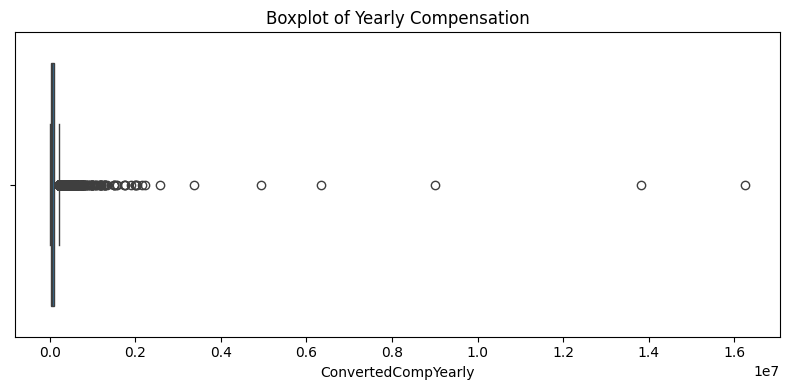

In [5]:
##Write your code here
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

iqr_outliers = df[
    (df["ConvertedCompYearly"] < lower_bound) |
    (df["ConvertedCompYearly"] > upper_bound)
]
print("Number of IQR outliers:", len(iqr_outliers))

plt.figure(figsize=(8, 4))
sns.boxplot(x=comp)
plt.title("Boxplot of Yearly Compensation")
plt.xlabel("ConvertedCompYearly")
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
df_no_outliers = df[
    (df["ConvertedCompYearly"] >= lower_bound) &
    (df["ConvertedCompYearly"] <= upper_bound)
]
print("Original DataFrame shape:", df.shape)
print("New DataFrame shape:", df_no_outliers.shape)

Original DataFrame shape: (65437, 114)
New DataFrame shape: (22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [7]:
##Write your code here
age_map = {
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}
df["Age_numeric"] = df["Age"].map(age_map)
numeric_cols = df.select_dtypes(include="number")
corr_matrix = numeric_cols.corr()
corr_matrix

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat,Age_numeric
ResponseId,1.000000,-0.000000,0.011955,-0.002406,-0.015738,-0.014197,-0.001908,0.001843,-0.002968,0.001991,-0.005365,-0.005865,-0.008363,0.002425,-0.038275
CompTotal,-0.000000,0.000000,0.028766,-0.004891,-0.002719,-0.003033,-0.006311,-0.005893,-0.004585,-0.004494,-0.003198,-0.003045,0.080457,-0.015770,-0.002695
WorkExp,0.011955,0.028766,1.000000,-0.026490,-0.067241,-0.104525,-0.065352,-0.101461,-0.046958,-0.088090,-0.113707,-0.108279,0.154114,0.097322,0.848567
JobSatPoints_1,-0.002406,-0.004891,-0.026490,1.000000,0.445710,0.633765,0.618618,0.603157,0.627385,0.597527,0.585087,0.607792,0.020306,0.094068,-0.027608
JobSatPoints_4,-0.015738,-0.002719,-0.067241,0.445710,1.000000,0.526254,0.449400,0.459253,0.438763,0.472516,0.499387,0.528395,0.018197,0.029677,-0.076200
JobSatPoints_5,-0.014197,-0.003033,-0.104525,0.633765,0.526254,1.000000,0.613933,0.607949,0.630353,0.619644,0.643538,0.690993,-0.023281,0.049224,-0.101506
JobSatPoints_6,-0.001908,-0.006311,-0.065352,0.618618,0.449400,0.613933,1.000000,0.692166,0.645094,0.632211,0.592528,0.604585,-0.008518,0.051341,-0.049930
JobSatPoints_7,0.001843,-0.005893,-0.101461,0.603157,0.459253,0.607949,0.692166,1.000000,0.698240,0.659558,0.642905,0.618444,-0.036431,0.038339,-0.083166
JobSatPoints_8,-0.002968,-0.004585,-0.046958,0.627385,0.438763,0.630353,0.645094,0.698240,1.000000,0.655668,0.617320,0.625185,-0.011080,0.058258,-0.046113
JobSatPoints_9,0.001991,-0.004494,-0.088090,0.597527,0.472516,0.619644,0.632211,0.659558,0.655668,1.000000,0.663628,0.650676,-0.015867,0.039173,-0.081717


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
